In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [233]:
df=pd.read_csv('heart_disease_uci.csv')
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [234]:
df.info() #fbs restecg, exang ,   slope,   thal               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [235]:
df['trestbps'].fillna(df['trestbps'].mean(),inplace=True)
df['chol'].fillna(df['chol'].mean(),inplace=True)
df['thalch'].fillna(df['thalch'].mean(),inplace=True)
df['oldpeak'].fillna(df['oldpeak'].mean(),inplace=True)
df['ca'].fillna(df['ca'].mean(),inplace=True)
df['fbs'].fillna('False',inplace=True)
df['restecg'].fillna('normal',inplace=True)
df['exang'].fillna('False',inplace=True)
df['slope'].fillna('flat',inplace=True)
df['thal'].fillna('normal',inplace=True)
df.isna().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [210]:
df_bivariada = pd.get_dummies(df['sex'], prefix='categoria')
df_final = pd.concat([df, df_bivariada], axis=1)
df_final

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,categoria_Female,categoria_Male
0,1,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0,0,1
1,2,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,2,0,1
2,3,67,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1,0,1
3,4,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0,0,1
4,5,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.676375,normal,1,1,0
916,917,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,False,0.878788,flat,0.676375,normal,0,0,1
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,0.676375,fixed defect,2,0,1
918,919,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,False,0.878788,flat,0.676375,normal,0,0,1


In [236]:
def bivariada(dataframe,var,target):
    df=pd.get_dummies(dataframe[[var,target]],prefix=var)
    df_final = pd.concat([dataframe, df], axis=1)
    return df_final
    

In [181]:
df_sex=bivariada(df,'sex','num')
df_sex['flag_doente'] = (df_sex['num'] != 0).astype('int64') 
df_sex.groupby(['flag_doente'])[[ 'sex_Male','sex_Female']].sum().reset_index()

,flag_doente,sex_Male,sex_Female
0,0,267.0,144.0
1,1,459.0,50.0


In [182]:
df_cp=bivariada(df,'cp','num')
df_cp['flag_doente'] = (df_cp['num'] != 0).astype('int64')
df_cp.groupby(['flag_doente'])[[ 'cp_asymptomatic','cp_atypical angina','cp_non-anginal','cp_typical angina']].sum().reset_index()

,flag_doente,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,0,104.0,150.0,131.0,26.0
1,1,392.0,24.0,73.0,20.0


In [183]:
df_slope=bivariada(df,'slope','num')
df_slope['flag_doente'] = (df_slope['num'] != 0).astype('int64')
df_slope.groupby(['flag_doente'])[[ 'slope_downsloping','slope_flat','slope_upsloping']].sum().reset_index()

,flag_doente,slope_downsloping,slope_flat,slope_upsloping
0,0,14.0,272.0,125.0
1,1,49.0,382.0,78.0


In [184]:
df_restecg['flag_doente'] = (df_restecg['num'] != 0).astype('int64')
df_restecg.groupby(['flag_doente'])[[ 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality']].sum().reset_index()

,flag_doente,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality
0,0,82.0,268.0,61.0
1,1,106.0,283.0,118.0


A variável cp me parece discriminar de uma forma muito clara os pacientes doentes.

# 2. Montando uma função para variavéis quantitativas continuas 

In [185]:
def categorizacao(dataframe,var):
    dataframe[var+'_cat']= pd.cut(dataframe[var], bins=5,right=False)
    
    return dataframe
    

In [186]:
data=categorizacao(df,'age')
data['age_cat'].value_counts()

[47.6, 57.4)      350
[57.4, 67.2)      277
[37.8, 47.6)      190
[67.2, 77.049)     54
[28.0, 37.8)       49
Name: age_cat, dtype: int64

# 3. Modelo de regressão logistica 

In [237]:
df['flag_doente'] = (df['num'] != 0).astype('int64')


In [188]:
reglog=smf.logit('flag_doente ~ sex + cp + trestbps + age',data=df).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.479040
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  920
Model:                          Logit   Df Residuals:                      913
Method:                           MLE   Df Model:                            6
Date:                Thu, 01 Jun 2023   Pseudo R-squ.:                  0.3032
Time:                        22:56:48   Log-Likelihood:                -440.72
converged:                       True   LL-Null:                       -632.47
Covariance Type:            nonrobust   LLR p-value:                 9.845e-80
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -3.7424      0.748     -5.005      0.000      -5.208      -2.277
sex[T.Male]               1.5420      0.216      7.129      0.000       1.118       1.966
cp[T.atypical angina]    -2.9249      0.257    -11.361      0.000      -3.429      -2.420
cp[T.non-anginal]        -1.8890      0.197     -9.613      0.000      -2.274      -1.504
cp[T.typical angina]     -1.7099      0.344     -4.967      0.000      -2.385      -1.035
trestbps                  0.0066      0.005      1.431      0.152      -0.002       0.016
age                       0.0548      0.010      5.734      0.000       0.036       0.074
=========================================================================================
"""

1. A chance de um homem ficar doente é 1.53 maior que de uma mulher. 
2. Sintomas de cp atypical angina ten 2.90 menos chance ser um ataque.
3. Sintomas de cp non-anginal tem 2.00 menos chance de ser um ataque.
4. Sintomas de cp typical angina tem 1.54 chance a menos de ser um ataque. 
5. A cada 0.0064 a mais na pressão sanguínea maior a chance de ataque.
6. A cada 0.0551 a mais na idade maior a chance de ataque. 
- A variável 'trestbps' não me parece explicativa na presença das demais. 


# 4. Avaliando a calibragem do modelo

In [189]:
df['predito']=reglog.predict(df)
df


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,age_cat,flag_doente,predito
0,1,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0,"[57.4, 67.2)",0,0.622457
1,2,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,2,"[57.4, 67.2)",1,0.926098
2,3,67,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1,"[57.4, 67.2)",1,0.905849
3,4,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0,"[28.0, 37.8)",0,0.230950
4,5,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0,"[37.8, 47.6)",0,0.027608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.676375,normal,1,"[47.6, 57.4)",1,0.513948
916,917,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,False,0.878788,flat,0.676375,normal,0,"[57.4, 67.2)",0,0.589084
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,0.676375,fixed defect,2,"[47.6, 57.4)",1,0.834738
918,919,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,False,0.878788,flat,0.676375,normal,0,"[57.4, 67.2)",0,0.864236


In [190]:
cat_pred=pd.qcut(df['predito'],5,duplicates='drop')
cat_pred.value_counts()

(0.012299999999999998, 0.217]    184
(0.217, 0.471]                   184
(0.471, 0.743]                   184
(0.743, 0.863]                   184
(0.863, 0.954]                   184
Name: predito, dtype: int64

In [191]:
group_reg=df.groupby(cat_pred)
qualid=group_reg[['flag_doente']].count().rename(columns={'flag_doente':'contagem'})
qualid

,contagem
predito,
"(0.012299999999999998, 0.217]",184
"(0.217, 0.471]",184
"(0.471, 0.743]",184
"(0.743, 0.863]",184
"(0.863, 0.954]",184


In [192]:
qualid['predito']=group_reg['predito'].mean()
qualid


,contagem,predito
predito,,
"(0.012299999999999998, 0.217]",184,0.103669
"(0.217, 0.471]",184,0.331468
"(0.471, 0.743]",184,0.620313
"(0.743, 0.863]",184,0.816926
"(0.863, 0.954]",184,0.893928


In [193]:
qualid['pct_doentes']=group_reg['flag_doente'].mean()
qualid

,contagem,predito,pct_doentes
predito,,,
"(0.012299999999999998, 0.217]",184,0.103669,0.081522
"(0.217, 0.471]",184,0.331468,0.331522
"(0.471, 0.743]",184,0.620313,0.663043
"(0.743, 0.863]",184,0.816926,0.809783
"(0.863, 0.954]",184,0.893928,0.880435


Text(0.5, 0, 'Grupo')

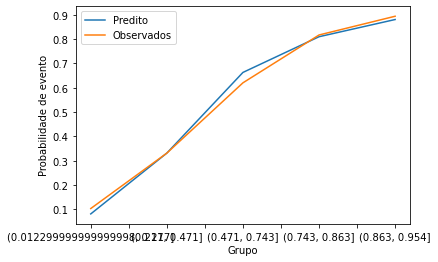

In [194]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax=qualid['pct_doentes'].plot(label='Predito')
ax=qualid['predito'].plot(label='Observados')

ax.legend()
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')


# 5. Avaliando o modelo acurácia, GINI e KS

In [195]:
from sklearn.metrics import roc_curve
from sklearn import metrics

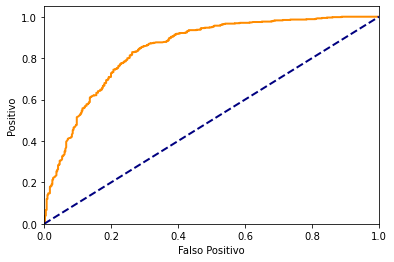

In [196]:
fpr,tpr,thersholds=metrics.roc_curve(df['flag_doente'],df['predito'])
plt.figure()
lw=2

auc_=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,color='darkorange',
        lw=lw,label=auc_)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Positivo')
plt.show()

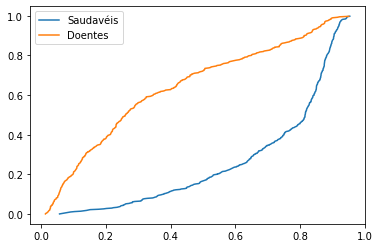

In [197]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

score_saudaveis=df.loc[df['flag_doente']==1,'predito']
ax.plot(np.sort(score_saudaveis),np.linspace(0,1,len(score_saudaveis),endpoint=False),label='Saudavéis')

score_doentes=df.loc[df['flag_doente']!=1,'predito']
ax.plot(np.sort(score_doentes),np.linspace(0,1,len(score_doentes),endpoint=False),label='Doentes')
ax.legend()






In [198]:
from sklearn import metrics
from scipy.stats import ks_2samp


In [199]:
acc= metrics.accuracy_score(df['flag_doente'],df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

fpr,tpr,thresholds=metrics.roc_curve(df['flag_doente'],df['predito'])
auc_=metrics.auc(fpr,tpr)

gini=2*auc_-1

ks=ks_2samp(df.loc[df['flag_doente']==1,'predito'],df.loc[df['flag_doente']!=1, 'predito']).statistic
print('KS: {0:.2F}% \nAU: {1:.2f}% \nGINI: {2:.2f}%'.format(ks*100,auc_*100,gini*100))

Acurácia: 78.37%
KS: 56.63% 
AU: 84.53% 
GINI: 69.06%


# 6. Melhorando o modelo

In [287]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num',
       'flag_doente', 'predito'],
      dtype='object')

In [337]:
reglog_final=smf.logit('flag_doente ~ sex + C(cp) + oldpeak + age + ca + chol + fbs + thalch + exang',data=df).fit()
reglog_final.summary()

Optimization terminated successfully.
         Current function value: 0.394973
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  920
Model:                          Logit   Df Residuals:                      906
Method:                           MLE   Df Model:                           13
Date:                Mon, 05 Jun 2023   Pseudo R-squ.:                  0.4255
Time:                        15:07:15   Log-Likelihood:                -363.37
converged:                       True   LL-Null:                       -632.47
Covariance Type:            nonrobust   LLR p-value:                1.121e-106
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.7058      1.026     -0.688      0.491      -2.716       1.305
sex[T.Male]                  1.1928      0.251      4.744      0.000       0.700       1.686
C(cp)[T.atypical angina]    -2.0942      0.285     -7.341      0.000      -2.653      -1.535
C(cp)[T.non-anginal]        -1.4103      0.227     -6.220      0.000      -1.855      -0.966
C(cp)[T.typical angina]     -1.1304      0.385     -2.938      0.003      -1.885      -0.376
fbs[T.True]                  0.5383      0.269      1.999      0.046       0.011       1.066
fbs[T.False]                 1.3549      0.415      3.264      0.001       0.541       2.169
exang[T.True]                1.1983      0.228      5.257      0.000       0.752       1.645
exang[T.False]               0.4712      0.348      1.353      0.176      -0.212       1.154
oldpeak                      0.5375      0.109      4.945      0.000       0.324       0.751
age                          0.0209      0.011      1.841      0.066      -0.001       0.043
ca                           0.9449      0.207      4.565      0.000       0.539       1.351
chol                        -0.0022      0.001     -2.126      0.034      -0.004      -0.000
thalch                      -0.0115      0.004     -2.649      0.008      -0.020      -0.003
============================================================================================
"""

In [338]:
df['predito']=reglog_final.predict(df)

In [339]:
cat_pred=pd.qcut(df['predito'],5,duplicates='drop')
cat_pred.value_counts()

(0.0102, 0.132]    184
(0.132, 0.437]     184
(0.437, 0.792]     184
(0.792, 0.919]     184
(0.919, 0.997]     184
Name: predito, dtype: int64

In [340]:
group_reg=df.groupby(cat_pred)
qualid=group_reg[['flag_doente']].count().rename(columns={'flag_doente':'contagem'})
qualid

,contagem
predito,
"(0.0102, 0.132]",184
"(0.132, 0.437]",184
"(0.437, 0.792]",184
"(0.792, 0.919]",184
"(0.919, 0.997]",184


In [341]:
qualid['predito']=group_reg['predito'].mean()
qualid

,contagem,predito
predito,,
"(0.0102, 0.132]",184,0.065065
"(0.132, 0.437]",184,0.259217
"(0.437, 0.792]",184,0.616342
"(0.792, 0.919]",184,0.866372
"(0.919, 0.997]",184,0.959308


In [342]:
qualid['pct_doentes']=group_reg['flag_doente'].mean()
qualid

,contagem,predito,pct_doentes
predito,,,
"(0.0102, 0.132]",184,0.065065,0.065217
"(0.132, 0.437]",184,0.259217,0.250000
"(0.437, 0.792]",184,0.616342,0.619565
"(0.792, 0.919]",184,0.866372,0.875000
"(0.919, 0.997]",184,0.959308,0.956522


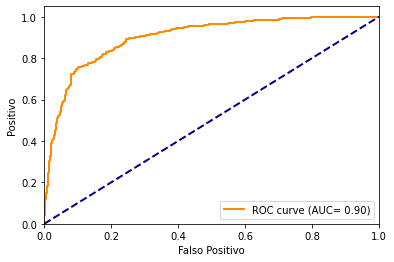

In [353]:
fpr,tpr,thersholds=metrics.roc_curve(df['flag_doente'],df['predito'])
plt.figure()
lw=2

auc_=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,color='darkorange',
        lw=lw,label='ROC curve (AUC= %0.2f)'%auc_)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Positivo')
plt.legend(loc='lower right')

- A curva ROC mostra o quão bom o modelo criado pode distinguir entre duas coisas. Essas duas coisas podem ser 0 ou 1, ou saudáveis e doentes.

O ROC possui dois parâmetros:

Taxa de verdadeiro positivo (True Positive Rate), que é dado por true positives / (true positives + false negatives)
Taxa de falso positivo (False Positive Rate), que é dado por false positives / (false positives + true negatives)

Assim, na tentativa de simplificar a análise da ROC, a AUC (“area under the ROC curve”) nada mais é que uma maneira de resumir a curva ROC em um único valor, agregando todos os limiares da ROC, calculando a “área sob a curva”.

AUC
O valor do AUC varia de 0,0 até 1,0. O limite entre a classe é 0,5. Ou seja, acima desse limite, o algoritmo classifica em uma classe (saudável ou doente) e abaixo na outra classe.

Quanto maior o AUC, melhor será o nosso modelo. 

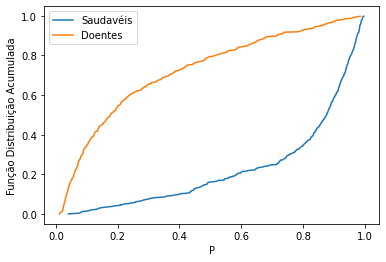

In [354]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

score_saudaveis=df.loc[df['flag_doente']==1,'predito']
ax.plot(np.sort(score_saudaveis),np.linspace(0,1,len(score_saudaveis),endpoint=False),label='Saudavéis')

score_doentes=df.loc[df['flag_doente']!=1,'predito']
ax.plot(np.sort(score_doentes),np.linspace(0,1,len(score_doentes),endpoint=False),label='Doentes')
ax.set_xlabel('P')
ax.set_ylabel('Função Distribuição Acumulada')
ax.legend()



- O gráfico do KS é composto pela distribuição acumulada do valor p gerado pelo modelo em cada uma das categorias da variável resposta(saudavéis e doentes). O KS então é calculado como a maior diferença entre as duas curvas. Ele pode assumir valores entre 0 e 1, sendo que quanto maior, melhor o desempenho do modelo. Esse modelo tem uma boa separação, pois há uma distância razoável entre as curva. Comparando com o modelo anterior houve uma melhora significativa. 

Text(0.5, 0, 'Grupo')

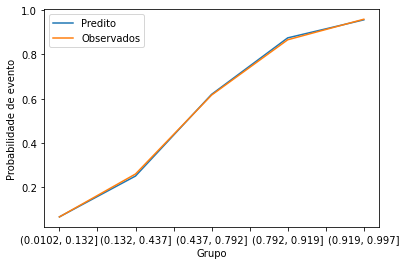

In [347]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax=qualid['pct_doentes'].plot(label='Predito')
ax=qualid['predito'].plot(label='Observados')

ax.legend()
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

É possível verificar que os valores observados e valores previsto evoluem de maneira quase uniforme, indicando que o modelo realiza previsões muito proximo dos valores reais.

In [348]:
acc= metrics.accuracy_score(df['flag_doente'],df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

fpr,tpr,thresholds=metrics.roc_curve(df['flag_doente'],df['predito'])
auc_=metrics.auc(fpr,tpr)

gini=2*auc_-1

ks=ks_2samp(df.loc[df['flag_doente']==1,'predito'],df.loc[df['flag_doente']!=1, 'predito']).statistic
print('KS: {0:.2F}% \nAU: {1:.2f}% \nGINI: {2:.2f}%'.format(ks*100,auc_*100,gini*100))

Acurácia: 81.96%
KS: 65.42% 
AU: 90.10% 
GINI: 80.21%


# Achei as variavéis que deixou o modelo mais robusto 